<div class="row">
    <div class="column">
        <img src="https://datasciencecampus.ons.gov.uk/wp-content/uploads/sites/10/2017/03/data-science-campus-logo-new.svg"
             alt="Data Science Campus Logo"
             align="right" 
             width = "340"
             style="margin: 0px 60px"
             />
    </div>
    <div class="column">
        <img src="https://cdn.ons.gov.uk/assets/images/ons-logo/v2/ons-logo.svg"
             alt="ONS Logo"
             align="left" 
             width = "420"
             style="margin: 0px 30px"/>
    </div>
</div>

# Bayesian Analysis

The core of Bayesian data analysis lies in its use of probability to describe the plausibility of different possibilities.

> "Bayesian inference is no more than counting the number of ways things can happen, according to our assumptions. Things that can happen more ways are more plausible."
>
> \- Richard McElreath, _Statistical Rethinking_

Once we have defined our assumptions, effectively our model of the world, Bayesian inference follows a logical path of analysis using probability theory.

> "Probability theory is just a calculus for counting, this means that we can use probability theory as a general way to represent plausibility, whether in reference to countable events in the world or rather theoretical constructs like parameters."  
>
> \- Richard McElreath, _ibid._

## A Toy Example: Estimating Global Surface Water

Suppose you have a globe, a model of the world small enough to hold in your hands. You want to know how much of the Earth's surface is covered in water, so you design an experiment: you will toss the globe into the air, and when you catch it again, you will note whether the globe shows land or water under your right index finger.

You toss the globe several times to generate a sequence of observations, the *data*: W L W W W L W L W

Where: W is water and L is land.

We now need to make some assumptions which will constitute the model. McElreath (_Statistical Rethinking_ 2.2) suggests that simple Bayesian model design benefits from three steps:
1. **Data Story** - Motivate the model by narrating how the data might arise
2. **Update** - Educate the model by feeding it the data
3. **Evaluate** - All statistical models require supervision, leading possibly to model revision.

### Data Story: How have the data come to be?

A data story tries to explain how data came to be, either as a **descriptive** or **causal** explanation. **Descriptive** accounts specify associations that can help predict outcomes of interest, while **causal** accounts explain how a process produces a given pattern. Causal storys can be rendered descriptively, but descriptive stories are hard to interpret causally. The point of a data story is that it is sufficiently complete to be able to generate new data, effectively by trying to explain how each piece of data is 'born' as a result of the underlying reality and the sampling process.

In the globe tossing example, we only really have to restate the sample process:
1. The true proportion of water covering the Earth is $p$.
2. A single toss of the globe thus has a probability $p$ of producing water (W) observations, and a probability of $1-p$ of producing land (L) observations.
3. Each toss of the globe is an independent trial - past tosses do not influence future tosses.

This data story can then be translated into a formal probability model.

### Bayesian updating: How do we use the data?

Coming up with a model is one thing, but how will the model learn from the data? Specifically, how can the different observations we have made help us decide between the different possible proportions of water on the globe?

The data help us determine the plausibility of each possible proportion. A Bayesian model starts with a given plausibility (a *prior*) assigned to every possible proportion of water, and then updates these plausibilities in line with the data seen to derive the *posterior* distribution, a better estimate of the plausibility of each proportion.

Without any data, we might start with a simple prior - every proportion of water has the same plausibility. Observing the first data point as W changes what we know - the plausibility for a 0.0 proportion of water falls to 0, it is effectively impossible now that we've observed water. Additionally, having observed no land yet, the plausibility of higher proportions of water is higher than lower proportions. As we add more data, we revise the plausibility of each value in $p$, when we see a W, it makes higher values of $p$ more plausible, while when we see an L it makes lower values of $p$ more plausible.

In principle, Bayesian data analysis is an iterated learning process, a starting prior is updated according to a data point, producing a posterior, which then becomes the prior for the next data point, updating in sequence until all data points are exhausted. In reality though, we don't tend to see this, instead presenting a computer all the data at once.

### Evaluation: How do we learn from the model?

There is no guarantee that the model is a good one, it relies on the validity of the assumptions made. In the globe tossing example, the Bayesian process will become increasingly sure of the true proportion of water in the world as more and more observations are made, however data is based on the toy globe, so the generalisability of the Bayesian estimate to the real world will ultimately depend on how good that globe is at representing the real world. A different model globe might lead to different answers with the same Bayesian procedure.

> "There is no approach to inference that provides universal guarantees. No branch of applied mathematics has unfettered access to reality, because math is not discovered, like the proton. Instead it is invented, like the shovel"  
>
> \- Richard McElreath, _ibid._

# Components of a Bayesian Model

## Likelihood

The **likelihood function** is a mathematical formula that calculates the plausibility of the data seen.

In the globe tossing example we can use the binomial likelihood function to derive a **likelihood** of the data occuring subject to different values of $p$. THis is because the binomial likelihood function works with binary data (success/failure, yes/no, true/false etc.) and in our model the outcome is binary Water or Not-Water (Land).

Let's look at the observed data: W L W W W L W L W

The binomial distribution is given as: $B(n, p)$ where $n$ is the number of trials, and $p$ is the probability of success.

From this, we can derive the probability of seeing $k$ successes, by getting the probability mass function for a given value of $k$.

The **likelihood** of the proportion of water on Earth being 0.5, given 9 trials and 6 successes (i.e. getting W six times from 9 tosses) can be calculated using scipy:

In [1]:
# Some imports.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, uniform, triang # nb I'll be using norm, uniform, triang later.

%matplotlib inline

In [2]:
#binom(9, 0.5).pmf(6)
binom.pmf(6,9,0.5) # k, n, p

0.16406250000000006

This value, 0.164, is the relative number of ways (i.e. out of 1) of getting six W's, when you do nine trials and $p$ is equal to 0.5.

If we change $p$ we get a different likelihood:

In [3]:
binom.pmf(6,9,0.7)

0.2668279319999999

There are more ways to get 6 waters from 9 trials if $p$ is 0.7 compared to 0.5.

In [4]:
binom.pmf(6,9, 0.3)

0.021003947999999974

There aren't that many ways of getting 6 waters from 9 trials if $p$ is 0.3, so it's quite a bit less plausible a value for the Earth's surface water than 0.5 or 0.7.

## Parameters

Most likelihood functions have adjustable inputs or **parameters**, in terms of the binomial likelihood, these are $p$ (the probability of success - e.g. the probability of observing water), $n$ (the number of trials - aka the sample size), and $k$ (the number of successes - e.g. the number of Ws observed).

In the globe tossing example, both $n$ and $k$ are data, leaving $p$ as our unknown. We want to know what is the most plausible value of $p$ given our data.

In other contexts, we may wish to estimate different different parameters of our model, or the model we use may have many more parameters than a simple binomial likelihood function.

## Priors

For every parameter that you want to estimate you need to provide a **prior**, an initial assignment of plausibility for each possible value of a parameter.

Prior are effectively engineering assumptions chosen to help the Bayesian model learn. Priors can be useful in constraining parameters to reasonable ranges or expressing any knowledge we have about the likely value of the parameter before any data is captured. When it comes to estimating the proportion of the Earth that is water, commonsense allows us to rule out $p = 0$ and $p = 1$. We can also assume that values close to 0 or 1 are less plausible than values near 0.5.

A prior is an assumption, it is reasonable to try different priors in order to test the sensitivity of a model.

## Posteriors

Once you know the likelihood function, the parameters to be estimated, and have a prior for each parameter the Bayesian model can be estimated. The resulting estimates - the relative plausibility of different parameter values, conditional on the data seen - are known as the **posterior distribution**.

In simple terms, the posterior distribution can be though of as:

$$\mathrm{Posterior} = \frac{\mathrm{Likelihood} \times \mathrm{Prior}}{\mathrm{Total\ Likelihood}}$$

Where the $\mathrm{Total\ Likelihood}$ standardises the posterior ensuring that the area under the curve is 1.

## Fitting a Model

Fitting Bayesian models and computing posterior distributions can be difficult, particularly when there are lots of parameters. There are a number of ways of fitting models, but three common approaches are: Grid Approximation, Quadratic Approximation, and MCMC (Markov Chain Monte Carlo).

### Grid Approximation

In **grid approximation**, we estimate the posterior probability of a parameter value on a finite grid. Most of the time however, there are too many parameters for this to be a practical tool.

The globe toss example is amenable to grid approximation as we are only estimating a single parameter:

In [5]:
# define a grid for the posterior
p_grid = np.linspace(start = 0, stop = 1, num = 20)
p_grid

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [6]:
# define the prior (here, a constant value of 1.)
prior = np.repeat(1, repeats = 20)
prior

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [7]:
# Compute the likelihood at each value in the grid according to the binomial distribution.
likelihood = binom.pmf(6, 9, p_grid) # k, n, gridded values of p.
likelihood

array([0.00000000e+00, 1.51814898e-06, 8.18509295e-05, 7.77292279e-04,
       3.59857537e-03, 1.11609461e-02, 2.66829865e-02, 5.29210991e-02,
       9.08269760e-02, 1.38341326e-01, 1.89768623e-01, 2.36114658e-01,
       2.66611252e-01, 2.71400562e-01, 2.45005089e-01, 1.89768623e-01,
       1.17918118e-01, 5.02667021e-02, 8.85384487e-03, 0.00000000e+00])

In [8]:
# Compute the posterior
unstandardised_posterior = likelihood * prior

# Standardise the posterior so that it sums to 1
posterior = unstandardised_posterior / np.sum(unstandardised_posterior)
posterior

array([0.00000000e+00, 7.98983711e-07, 4.30771684e-05, 4.09079660e-04,
       1.89388732e-03, 5.87387288e-03, 1.40429377e-02, 2.78517436e-02,
       4.78011547e-02, 7.28073907e-02, 9.98729639e-02, 1.24264330e-01,
       1.40314323e-01, 1.42834880e-01, 1.28943257e-01, 9.98729639e-02,
       6.20588995e-02, 2.64547661e-02, 4.65967300e-03, 0.00000000e+00])

We can plot the posterior distribution to get a better sense of what it looks like, naturally more points in your grid will give a smoother approximation of the posterior distribution.

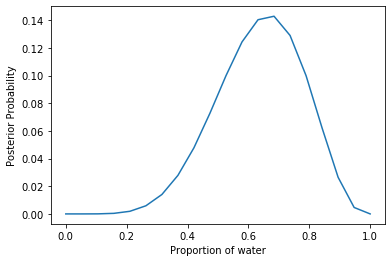

In [9]:
f, ax = plt.subplots(figsize = (6,4))
ax.plot(p_grid,posterior)
ax.set_xlabel('Proportion of water')
ax.set_ylabel('Posterior Probability');

We could rerun the experiment with a different prior to see how the posterior changes, for instance:

In [10]:
prior = np.where(p_grid < 0.5, 0, 1)
prior

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

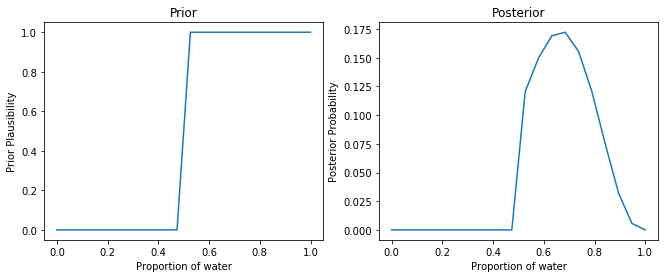

In [11]:
# Compute the posterior
unstandardised_posterior = likelihood * prior
# Standardise the posterior so that it sums to 1
posterior = unstandardised_posterior/ np.sum(unstandardised_posterior)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,4))
# prior
ax1.plot(p_grid, prior)
ax1.set_xlabel('Proportion of water')
ax1.set_ylabel('Prior Plausibility')
ax1.set_title('Prior')
# posterior
ax2.plot(p_grid, posterior)
ax2.set_xlabel('Proportion of water')
ax2.set_ylabel('Posterior Probability')
ax2.set_title('Posterior');

Or,

In [12]:
prior = np.exp(-5 * np.abs(p_grid-0.5))
prior

array([0.082085  , 0.10679522, 0.13894401, 0.18077063, 0.23518839,
       0.30598765, 0.39809977, 0.51794059, 0.67385735, 0.87671006,
       0.87671006, 0.67385735, 0.51794059, 0.39809977, 0.30598765,
       0.23518839, 0.18077063, 0.13894401, 0.10679522, 0.082085  ])

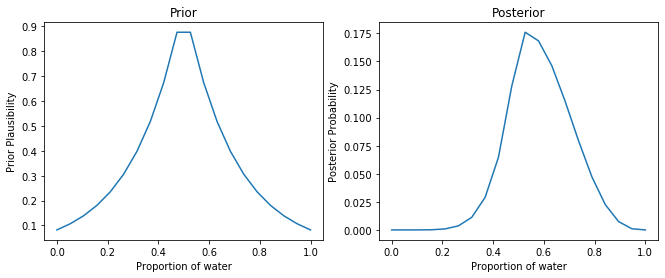

In [13]:
# Compute the posterior
unstandardised_posterior = likelihood * prior
# Standardise the posterior so that it sums to 1
posterior = unstandardised_posterior/ np.sum(unstandardised_posterior)

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,4))
# prior
ax1.plot(p_grid, prior)
ax1.set_xlabel('Proportion of water')
ax1.set_ylabel('Prior Plausibility')
ax1.set_title('Prior')
# posterior
ax2.plot(p_grid, posterior)
ax2.set_xlabel('Proportion of water')
ax2.set_ylabel('Posterior Probability')
ax2.set_title('Posterior');

Clearly, different priors can influence the posterior, the strong final prior clearly pulls the peak of the posterior distribution left towards the peak of the prior at 0.5.

### Quadratic Approximation

The globe tossing model has one parameter, estimating the parameter value, even on a fine grid, say 100 or 1000 points, is relatively easy. However, if we had two parameters to estimate we'd need $100^{2}$ or $1000^{2}$ points, and as we add more parameters grid approximation just doesn't scale. Instead, **quadratic approximation** may be a useful alternative.

The quadratic approximation makes a normal or 'Gaussian' approximation to the posterior, which is computationally lightweight as a normal distribution can be defined with just a mean and a standard deviation.

Using `pymc3`, we can specify our model and get the mean and standard deviation:
* We get the mean by finding the **maximum a posteriori**, basically the peak, or mode, of the posterior distribution. 
* The standard deviation is a little more tricky. In simple terms, the optimiser that finds the maximum *a posteriori* uses a transformation called a Hessian to find the peak of the distribution. Mathematically, the inverse of a Hessian gives us the covariance of a Gaussian distribution. The square root of this number therefore gives us the standard deviation.

In [3]:
import pymc3 as pm

In [6]:
globe_model = pm.Model()

# W L W W W L W L W
data = np.array([1,0,1,1,1,0,1,0,1])

# Specify the model
with globe_model:   
    p = pm.Uniform('p', lower = 0, upper = 1) # prior
    k = pm.Binomial('k', n = len(data), p = p, observed = data.sum()) # likelihood

In the model above, we specify the prior for $p$ as belonging to a uniform distribution, ranging from 0 to 1. This is the only prior because $p$ is the only thing we want to estimate, the other parameters in our model ($n$ and $k$) are observed data.

The likelihood function is given by the Binomial distribution as previously, here $n$, the number of trials, is the number of samples in our data (`len(data)`) while the number of observed successes is the number of 1s in `data`, simply `data.sum()`. As we don't have any observations for $p$, we set it to the prior variable we just defined.

Now we're ready to use the model!

In [11]:
mean = pm.find_MAP(model = globe_model)
mean['p']

C:\Python36\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1.8075, ||grad|| = 1.5: 100%|███████████████████████████████████████████████████| 7/7 [00:00<00:00, 411.74it/s]


array(0.66666667)

The MAP (maximum a posteriori) estimate of our posterior distribution is 0.67, that is, the peak of the posterior distribution of $p$ is at 0.67. We'll use this as the mean in our normal (quadratic) approximation of the full posterior distribution.

In [12]:
# standard deviation is the square root of the inverse of the Hessian.
std_dev = np.sqrt(1/(pm.find_hessian(mean, vars = [p], model = globe_model)[0]))
std_dev

array([0.15713484])

The estimate of the standard deviation of $p$ is 0.16. Having an estimate of the mean and standard deviation of $p$ allows us to specify a normal curve that appromximates the posterior distribution of $p$, the proportion of the surface of the Earth that is water.

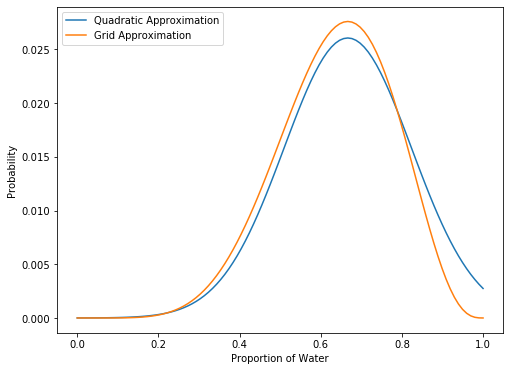

In [14]:
f, ax = plt.subplots(figsize = (8,6))
x = np.linspace(0,1,100)
norm_pdf = norm.pdf(x, mean['p'], std_dev)
ax.plot(x, norm_pdf/sum(norm_pdf), label = "Quadratic Approximation")

# Grid Approximation on 100 gridpoints with flat (uniform) prior.
prior = np.repeat(1, 100)
likelihood = binom.pmf(6, 9, x)
# Compute the posterior
unstandardised_posterior = likelihood * prior
# Standardise the posterior so that it sums to 1
posterior = unstandardised_posterior/ np.sum(unstandardised_posterior)
ax.plot(x, posterior, label = 'Grid Approximation')
ax.legend()
ax.set_xlabel("Proportion of Water")
ax.set_ylabel('Probability');

Quadratic approximation is not great with small numbers, notice the difference between the grid approximation and the quadratic. However, the quadratic approximation will improve with more data.

### MCMC (Markov Chain Monte Carlo)

As models get more complicated, both grid approximation and quadratic approximation are often insufficient. In these situations, we can turn to **MCMC** approaches, a family of techniques that work on the basis of sampling. Rather than attempt to directly compute (grid) or approximate (quadratic) the posterior distribution, MCMC draws samples from the posterior distribution which can be used to build a picture of the posterior from the histogram of the samples.

In [7]:
posterior_sample = pm.sample(model = globe_model, random_seed=99)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [p]
Sampling 2 chains: 100%|████████████████████████████████████████████████████████| 2000/2000 [00:45<00:00, 44.14draws/s]


MCMC samplers are complicated things, but as this is a simple task and `pymc3` generally has good defaults, we'll go with the defaults. This computes two 'chains' of 500 samples each, giving 1000 samples to work with.

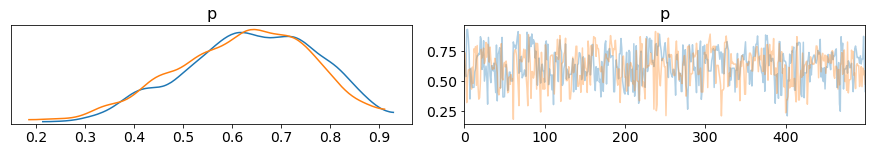

In [8]:
pm.traceplot(posterior_sample);

This 'trace plot' requires `arviz` to draw, the traceplot gives a sense of how well mixed your samples are, and hence whether the mcmc process is a good one.

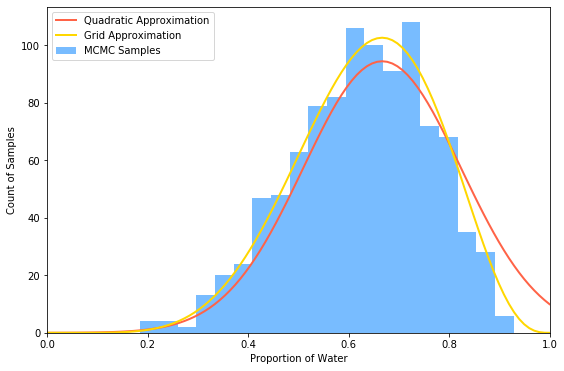

In [15]:
f, ax = plt.subplots(figsize=(9,6))
n, bins, patches = ax.hist(posterior_sample.get_values(p),
                           bins = 20, 
                           color = 'dodgerblue', 
                           alpha = 0.6,
                           label = 'MCMC Samples')

# Quadratic Approximation
qa_curve = norm_pdf * np.sum(np.diff(bins) * n)
ax.plot(x, qa_curve, 
        color = 'tomato', 
        linewidth = 2, 
        label = 'Quadratic Approximation')

# Grid Approximation
grid_curve = posterior * np.sum(np.diff(bins) * n) * 100
ax.plot(x, grid_curve, 
        color = 'gold', 
        linewidth = 2, 
        label = 'Grid Approximation')

ax.legend()
ax.set_xlim([0,1])
ax.set_xlabel("Proportion of Water")
ax.set_ylabel("Count of Samples");

The MCMC sampler has created samples from the posterior distribution of $p$ that are very similar in their distribution to the other approximations of the posterior distribution of $p$. 

We can look at the descriptives of the samples to learn more about the posterior.

## Summarising a Posterior Distribution

`pymc3` provides a basic summary of the posterior distribution:

In [9]:
pm.summary(posterior_sample)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p,0.625112,0.138195,0.006145,0.369255,0.88604,440.679123,1.004133


The observations sampled from the posterior are often known as the *trace*.

In the summary, mean and standard deviation are straightforward, the remaining summaries are:
* `mc_error` - This is the simulation standard error, or 'monte carlo standard error', for the trace, it gives you a sense of the precision with which you can estimate the mean.
* `hpd_2.5`, `hpd_97.5` - This is the 'highest posterior density' (HPD) for given alpha (default: 0.05) for the trace. The HPD is the minimum width Bayesian credible interval (BCI). It is the interval within which a particular parameter value falls with a given probability.
* `n_eff` - This is a diagnostic that computes the effective sample size, accounting for the number of effectively independent draws from the posterior distribution.
* `Rhat`  - This is the Gelman-Rubin diagnostic test ($\hat{R}$) that tests for convergence of the mcmc process. A good value is close to 1 as Rhat is the ratio of within chain to between chain variance, which should be identical under convergence.

There are a range of common questions that we may wish to answer using the sample, including:

* How much of the posterior probability lies below a given parameter value?
* How much posterior probability lies between two parameter values?
* Which parameter value marks the lower 5% of the posterior distribution?
* Which range of parameter values contains 90% of the posterior probability?
* Which parameter value has the highest posterior probability?

### How much of the posterior probability is less than 0.5?

Effectively, what is the posterior probability that surface water makes up less than 50% of the Earth's surface?

In [10]:
# Using mcmc samples
posterior_sample_array = posterior_sample.get_values(p)

(posterior_sample_array < 0.5).sum()/len(posterior_sample_array)

0.187

About 19% of the posterior probability is below 0.5, as you can see this is simply the relative frequency of samples with a value below 0.5, out of the total number of samples.

### How much of the posterior probability lies between 0.5 and 0.75?

In [31]:
((posterior_sample_array > 0.5) & (posterior_sample_array < 0.75)).sum() / len(posterior_sample_array)

0.617

Around 62% of the posterior probability lies within a proportion of 0.5 and 0.75.

### What is the value that covers the lower 80% of the posterior distribution?

In [32]:
np.percentile(posterior_sample_array, 80)

0.7480285295709704

80% of the samples in the posterior distribution lay below a value of $p$ = 0.75

### What are the values that cover the middle 80% of the posterior distribution?

In [33]:
np.percentile(posterior_sample_array, [10, 90])

array([0.434197  , 0.80024873])

The middle 80% is the range from the 10th to the 90th percentile. This relates to a posterior probability from 0.43 to 0.80.

### Highest Probability Density Interval

In [34]:
pm.stats.hpd(posterior_sample_array, 0.2)

array([0.45417107, 0.81199932])

The 'middle 80%' is effectively the central 80% of the distribution (e.g. centred on the median at 50%), what the highest probability density interval does is different, focusing on finding the range that has 80% of the probability mass in the shortest possible range. This turns out to be between 0.45 and 0.81, effectively slightly to the right of centre but still containing the most probable parameter value.

### Point Estimates - Mean, Median, Mode

In [35]:
np.mean(posterior_sample_array), np.median(posterior_sample_array)

(0.625112096334196, 0.6346555283051852)

Means and medians of continuous data are straightforward, modes are not. The mode is the MAP - the maximum a posteriori value we computed earlier - which can be found using `pymc3`. However, as an illustration in this case we can compute the kernel density estimate of the samples and get the largest value, which is the mode of the distribution.

In [17]:
from scipy.stats import gaussian_kde

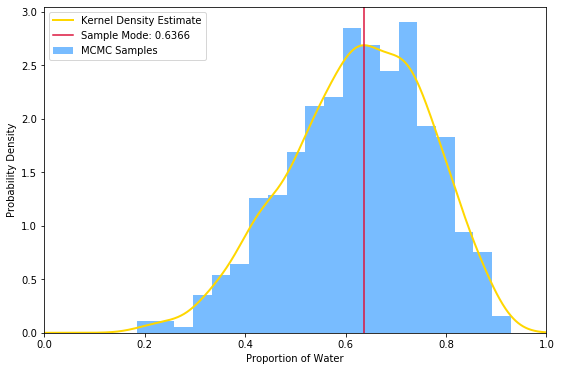

In [18]:
# Calculate KDE
xs = np.linspace(0,1,1000)
density = gaussian_kde(posterior_sample_array)(xs)

f, ax = plt.subplots(figsize=(9,6))
# Plot histogram of samples
n, bins, patches = ax.hist(posterior_sample_array,
                           density = True,
                           bins = 20, 
                           color = 'dodgerblue', 
                           alpha = 0.6,
                           label = 'MCMC Samples')
# plot density curve
ax.plot(xs, density, color = 'gold', linewidth = 2, label = 'Kernel Density Estimate')

# calculate the mode
mode_index = np.where(density == max(density))
mode = xs[mode_index]
# plot the mode
ax.axvline(mode, color = 'crimson', label = f"Sample Mode: {mode[0].round(4)}")

ax.legend()
ax.set_xlim([0,1])
ax.set_xlabel("Proportion of Water")
ax.set_ylabel("Probability Density");

The mode we've calculated is similar to the one produced earlier by the `.find_MAP()` method.

In this case, the median and mean all fall below the mode estimate, which is a better estimate of the most probable value for surface water coverage.

# Consolidation

Now we know the components of a Bayesian model. The aim is generally to derive a posterior probability distribution, these state the relative numbers of ways that each possible cause of the data could have generated the data we see. This indicates the relative plausibility of different values.

In the case of the globe tossing experiment, we wanted to understand the plausibility of different values for the proportion of water covering the surface of the earth. We were able to specify a prior and a likelihood and estimate the posterior probability in a number of ways, using grid approximation, quadratic approximation and MCMC. Each gives a result showing that the most plausible values for the proportion of water covering the earth lies around 0.64. The appropriateness of each of these fitting methods depends on the model in question.

# Exercise

Repeat the globe tossing experiment, but using a more informative prior and see how the outcomes change using `pymc3`, either using quadratic approximation or mcmc.

For instance:

* "The world is definitely majority water prior": `p = pm.Uniform('p', lower = 0.5, upper = 1)`  
* "Strong feeling about 50% prior" : `p = pm.Trianglar('p', lower = 0, upper = 1, c = 0.5)`
* "Really strong feeling about 50% prior":  
```python
bounded_laplace = pm.Bound(pm.Laplace, lower = 0.0, upper = 1.0)
p = bounded_laplace('p', mu = 0.5, b = 0.5) # prior
```

Continuous distributions in `pymc3` are [here](https://docs.pymc.io/api/distributions), remember though that because the prior is for $p$ it needs to be bounded [0,1] , otherwise it won't make sense when passed to the binomial likelihood function.

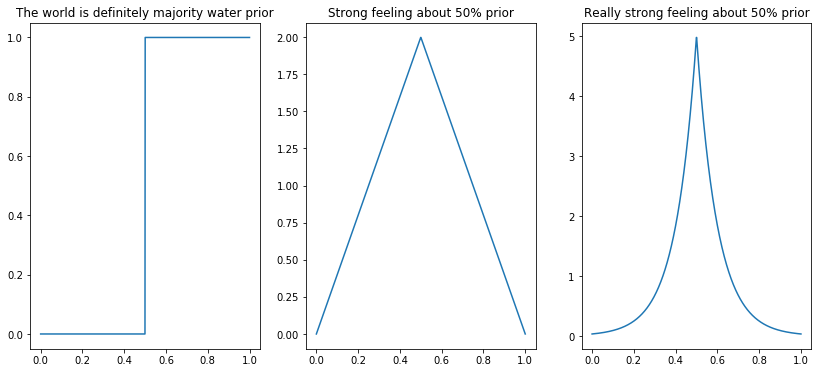

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (14, 6))

xs = np.linspace(0,1, 1000)

unif = uniform(loc = 0.5, scale = 1)
ax1.plot(xs, unif.pdf(xs))
ax1.set_title("The world is definitely majority water prior")

tri = triang(c = 0.5, loc = 0, scale = 1)
ax2.plot(xs, tri.pdf(xs))
ax2.set_title("Strong feeling about 50% prior")

bounded_laplace = pm.Bound(pm.Laplace, lower = 0.0, upper = 1.0)
t = bounded_laplace.dist(mu = 0.5, b = 0.1)
ax3.plot(xs, np.exp(t.logp(xs).eval()))
ax3.set_title("Really strong feeling about 50% prior");

In [2]:
# Try a little code here


In [ ]:
# Majority water uniform prior
%load ./Solutions/bayesian_ex1.py

In [ ]:
# Triangular prior
%load ./Solutions/bayesian_ex2.py

In [ ]:
# bounded laplace prior
%load ./Solutions/bayesian_ex3.py

# Linear Regression Models

## Model Description

* **Outcome Variables** - The data (set of measurements) that we want to predict or explain with the model.
* **Outcome Likelihood** - The likelihood function that defines the plausibility of individual observations in the outcome data. In linear regression this is always the normal (Gaussian) distribution.
* **Explanatory Variables** - The remaining data that we want to model to predict or explain the outcome.
* **Relationship Likelihood to Predictors** - The explanatory variables are related to the outcome likelihood parameters.
* **Priors Specified** - All parameters for the model have a prior set to explain the initial state of the model before seeing the data.

The model description can be rendered in mathematical notation like:  

$$
\mathrm{outcome}_{i} \sim \mathrm{Normal}(\mu_{i},\sigma)  \\
\mu_{i} = \alpha + \beta \times \mathrm{explanatory}_{i}  \\
\alpha \sim \mathrm{Normal}(0, 1)  \\
\beta \sim \mathrm{Normal}(0, 1)  \\
\sigma \sim \mathrm{Uniform}(0,1)  
$$

The mathematical definition gives an unambiguous account of the model.

The first line defines the **likelihood** function for the outcome variable we're interested in. In this case we're building a linear regression model, thus we assume the outcome is the realisation of a normal distribution with given mean ($\mu$) and standard deviation ($\sigma$). 

The tilde ($\sim$) specifies that the outcome or prior is stochastic (random), although the outcome or prior is mapped to a  distribution, no single outcome can be known with any certainty. Instead, the distibution identifies the different plausibility of values for the outcome or prior.

The second line is the linear model $\alpha + \beta\ \mathrm{explanatory}_{i}$, note that it is specifying the values for $\mu_{i}$, effectively we're choosing the mean value of $\mathrm{outcome}_{i}$ subject to the linear model. This is a deterministic relation, we have an $=$ instead of a $\sim$, $\mu_{i}$ is no longer a prior but constructed from other parameters, $\alpha$ and $\beta$ and the explanatory variable of interest. If you know $\alpha$, $\beta$ and $\mathrm{explanatory}_{i}$ you can determine the mean for $\mathrm{outcome}_{i}$.

The simple linear model $\alpha + \beta\ \mathrm{explanatory}_{i}$ has two parameters to estimate, equivalent to a conventional linear model:
* $\alpha$ - What is the expected (mean) value of the outcome when the explanatory variable is equal to 0. Known as the **intercept**.
* $\beta$ - What is the change in the expected (mean) value of the outcome subject to a 1 unit change in the explanatory variable. Known as the **slope** or the **gradient**.

Now, we have three priors to deal with, the two model parameters $\alpha$ and $\beta$ and the standard deviation of the outcome $\sigma$. Without any additional information, we might use a normal prior for $\alpha$ and $\beta$ with a reasonable mean for the data in question and an arbitrarily large standard deviation to give the model a bit of freedom in finding a good solution. The prior for $\sigma$ should always be greater than zero, as we can't have a negative standard deviation, therefore a wide uniform prior starting at zero is a weak prior that allows the model some flexibility.

## A Practical Example: Heights of Criminals

In 1902, a social scientist called W. R. Macdonell published a paper called "On criminal anthropometry and the identification of criminals". He was particularly interested in whether a limited number of anthropometric measurements could be applied to the 'identification' of criminals. It not clear from the paper whether this refers to the use of biometric-like measurements to create a unique profile that distinguishes individual criminals, or indeed whether he's interested in the possibility that certain sets of measurements could identify criminality.

In any case, the data we have are measurements from 3,000 criminals in London:

> "Three thousand metric forms were thereupon obtained from Scotland Yard, containing particulars of 3000 male prisoners undergoing their sentences in the chief prisons of England and Wales. The majority of the prisoners were English and Welsh, many were Irish, and only a few Scotch; no foreigners or youths under 21 were included. The forms were drawn at random from the mass on the office shelves; we are therefore dealing with a random sampling"
>
> \- W. R. Macdonell, 1902.

The two variables which we have are:

* Height in cm.
* Length of left middle finger in cm.

In [7]:
import pandas as pd

In [8]:
criminals = pd.read_csv("./Data/criminals_1902.csv", index_col=0)
criminals.describe()

,finger_length,height
count,3000.000000,3000.000000
mean,11.547367,166.301420
std,0.548714,6.496702
min,9.500000,142.240000
25%,11.200000,162.560000
50%,11.500000,165.100000
75%,11.900000,170.180000
max,13.500000,195.580000


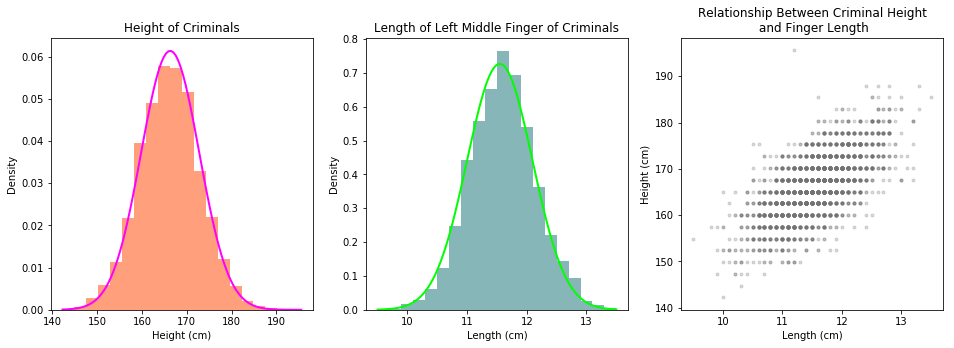

In [6]:
# Make some plots
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16,5))

# Heights
ax1.hist(criminals['height'], bins = 20, normed = True, color = 'coral', alpha = 0.75)
xs = np.linspace(criminals['height'].min(),criminals['height'].max(),100)
norm_ys = norm.pdf(xs, loc = criminals['height'].mean(), scale = criminals['height'].std())
ax1.plot(xs, norm_ys, color = 'fuchsia', linewidth = 2)
ax1.set_title("Height of Criminals")
ax1.set_ylabel("Density")
ax1.set_xlabel('Height (cm)')

# Finger lengths
ax2.hist(criminals['finger_length'], bins = 20, normed = True, color = 'cadetblue', alpha = 0.75)
xs = np.linspace(criminals['finger_length'].min(),criminals['finger_length'].max(),100)
norm_ys = norm.pdf(xs, loc = criminals['finger_length'].mean(), scale = criminals['finger_length'].std())
ax2.plot(xs, norm_ys, color = 'lime', linewidth = 2)
ax2.set_title("Length of Left Middle Finger of Criminals")
ax2.set_ylabel("Density")
ax2.set_xlabel('Length (cm)')

# Scatter
ax3.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.45', alpha = 0.25)
ax3.set_title("Relationship Between Criminal Height\n and Finger Length")
ax3.set_ylabel('Height (cm)')
ax3.set_xlabel('Length (cm)');

We're going to build a Bayesian Linear Regression model to predict criminal height as a linear function of finger length. We'll start with the following model specification:

$$
\mathrm{height}_{i} \sim \mathrm{Normal}(\mu_{i},\sigma)  \\
\mu_{i} = \alpha + \beta \times \mathrm{finger length}_{i}  \\
\alpha \sim \mathrm{Normal}(166, 100)  \\
\beta \sim \mathrm{Normal}(0, 10)  \\
\sigma \sim \mathrm{Uniform}(0,50)  
$$

The likelihood is Gaussian, with the mean dependent on finger length.

The prior for $\alpha$ is Gaussian, centred on the overall mean for criminal heights, but with a huge standard deviation that will effectively allow the parameter to settle over an appropriate value for $\alpha$, conceptually the mean height of criminals when finger length is 0 (although this is nonsense in practice). 

The prior for $\beta$ is conservative, as a Gaussian centred on 0, it implies that we are giving equal weight to the possibility of positive or negative parameter values for $\beta$ (e.g. positive or negative slopes), even though it should be apparent that we would expect $\beta$ to be positive. Also, as a $\beta$ of 0 suggests no relationship, it is a conservative prior assumption. The large standard deviation is again permissive, allowing the parameter to move easily to a meaningful value and ultimately mitigating any initial conservatism to a very small impact if any on the posterior distribution. In this context, with a lot of data, the impact of this conservative prior is very weak, however with less data a more informative prior may be useful.

The prior for $\sigma$ is flat with a huge range, again giving the model flexibility to move where it needs to to achieve a good fit.

Let's convert the mathematical model expression above into `pymc3` code:

In [9]:
criminals_model = pm.Model()

with criminals_model:
    # Priors
    alpha = pm.Normal('alpha', mu = 166, sd = 100)
    beta = pm.Normal('beta', mu = 0, sd = 10)
    sigma = pm.Uniform('sigma', lower = 0, upper = 50)
    
    # Linear Model
    mu = alpha + beta * criminals['finger_length']
    
    # Likelihood
    height = pm.Normal('height', mu = mu, sd = sigma, observed = criminals['height'])

## Posterior Inference

Having created the model, we can begin to use it to explore the relationship between finger length and height.

Below, we get the *maximum a posteriori* values for $\alpha$ and $\beta$ and plot the line this entails within the domain of the data. This is effectively the mean line, the most plausible line drawn from the infinite possible lines that make up the posterior distribution of this model.

Note that the *maximum a posteriori* line is very similar to the standard least squares fit.

In [10]:
criminals_map = pm.find_MAP(model = criminals_model)
print(f"model alpha: {criminals_map['alpha']}, model beta: {criminals_map['beta']}")

C:\Python36\lib\site-packages\pymc3\tuning\starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -9,040.5, ||grad|| = 0.87177: 100%|████████████████████████████████████████████| 34/34 [00:00<00:00, 515.14it/s]


model alpha: 76.70927324811507, model beta: 7.758674279161939


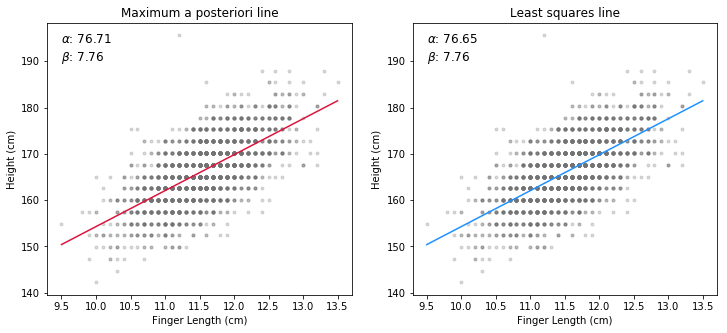

In [13]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))

# Maximum a posteriori
xs = np.linspace(criminals['finger_length'].min(),criminals['finger_length'].max(),2)
yhat_bayes = criminals_map['alpha'] + criminals_map['beta'] * xs
ax1.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.45', alpha = 0.25)
ax1.plot(xs, yhat_bayes, color = 'crimson')
ax1.set_title("Maximum a posteriori line")
ax1.text(9.5, 194, r"$\alpha$: " + str(criminals_map['alpha'].round(2)), fontsize = 12)
ax1.text(9.5, 190, r"$\beta$: " + str(criminals_map['beta'].round(2)), fontsize = 12)
ax1.set_ylabel('Height (cm)')
ax1.set_xlabel('Finger Length (cm)')

# Least squares
params = np.polyfit(criminals['finger_length'], criminals['height'], deg = 1)

yhat_ols = params[1] + params[0] * xs
ax2.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.45', alpha = 0.25)
ax2.plot(xs, yhat_ols, color = 'dodgerblue')
ax2.set_title("Least squares line")
ax2.text(9.5, 194, r"$\alpha$: " + str(params[1].round(2)), fontsize = 12)
ax2.text(9.5, 190, r"$\beta$: " + str(params[0].round(2)), fontsize = 12)
ax2.set_ylabel('Height (cm)')
ax2.set_xlabel('Finger Length (cm)');

The *maximum a posteriori* line doesn't give us much of a sense of uncertainty, or the range of plausible values that the $\alpha$ and $\beta$ parameters could take. This is kind of the point of Bayesian modelling, so let's go further, to do this we'll use mcmc to sample from the posterior distribution of $\alpha$, $\beta$ and $\sigma$.

In [13]:
posterior = pm.sample(model=criminals_model, tune = 4500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, beta, alpha]
Sampling 2 chains: 100%|██████████████████████████████████████████████████████| 10000/10000 [04:10<00:00, 39.86draws/s]


In [14]:
# Summary of the posterior samples.
pm.summary(posterior)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
alpha,76.899685,1.810809,0.093315,73.404889,80.196718,313.782540,1.008430
beta,7.742133,0.156479,0.008076,7.451912,8.048491,312.169502,1.008284
sigma,4.910659,0.063177,0.002804,4.792750,5.036895,488.747673,1.010586


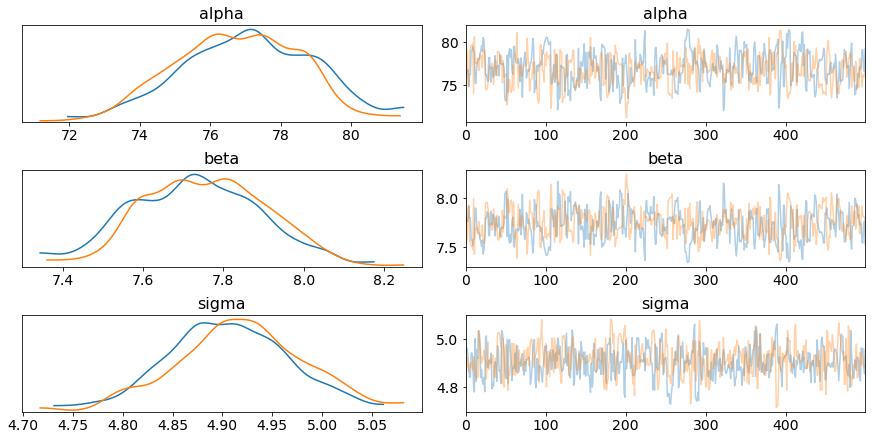

In [16]:
pm.traceplot(posterior);

In [ ]:
# If you can't easily run the sampler (likely), I've sampled a posterior for you!
# The posterior results object was pickled, here you can load it and use it as expected.
import pickle

posterior = pickle.load(open('./Data/posterior.p', 'rb'))

## Introducing Uncertainty

The posterior effectively contains lots of lines given by the $\alpha$ and $\beta$ estimates, the MAP is the most plausible of these lines, but the variation in the sample of lines gives a sense of the uncertainty in the estimate of the 'mean' line.

To get an idea of this uncertainty, let's plot a few of the lines in the posterior.

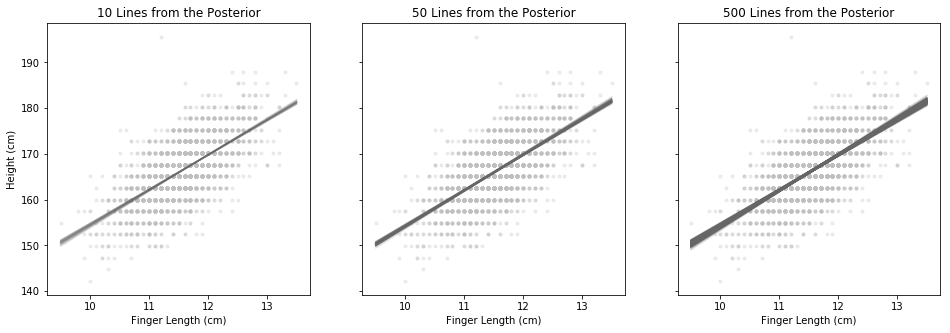

In [68]:
# Plots
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (16, 5), sharex = True, sharey = True)

# x values for lines
xs = np.array([criminals['finger_length'].min(), criminals['finger_length'].max()]).reshape((-1,1))

# ax1 - ten random lines
rand_10 = np.random.randint(0,1000,10)
ten_lines = posterior[alpha][rand_10] + posterior[beta][rand_10] * xs
ax1.plot(xs, ten_lines, color = '0.4', alpha = 0.33)
ax1.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.75', alpha = 0.25)
ax1.set_ylabel('Height (cm)')
ax1.set_xlabel('Finger Length (cm)')
ax1.set_title("10 Lines from the Posterior")

# ax2 - fifty random lines
rand_50 = np.random.randint(0,1000,50)
fifty_lines = posterior[alpha][rand_50] + posterior[beta][rand_50] * xs
ax2.plot(xs, fifty_lines, color = '0.4', alpha = 0.2)
ax2.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.75', alpha = 0.25)
ax2.set_xlabel('Finger Length (cm)')
ax2.set_title("50 Lines from the Posterior")

# ax2 - fifty random lines
rand_500 = np.random.randint(0,1000,500)
fivehundred_lines = posterior[alpha][rand_500] + posterior[beta][rand_500] * xs
ax3.plot(xs, fivehundred_lines, color = '0.4', alpha = 0.1)
ax3.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.75', alpha = 0.25)
ax3.set_xlabel('Finger Length (cm)')
ax3.set_title("500 Lines from the Posterior");

Plotting these lines demonstrates the variation in estimates for the $\alpha$ and $\beta$ parameters. Obviously this isn't entirely practical so rather than plot the sampled lines, in reality we would use a Bayesian confidence interval. Let's build up to that by first looking at the distribution of mean estimates for a given finger length.

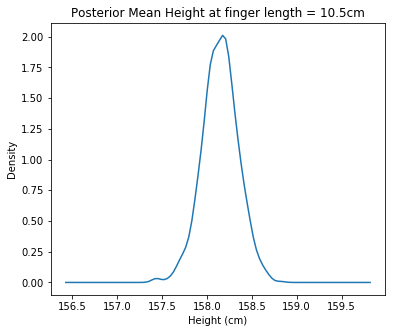

In [77]:
finger_length = 10.5 # cm

# means from posterior
mean_at_10_5 = posterior[alpha] + posterior[beta] * finger_length

# Plot the density curve for the posterior means.
f, ax = plt.subplots(figsize = (6,5))

xs = np.linspace(mean_at_10_5.min() - 1, mean_at_10_5.max() + 1, 100)
densities = gaussian_kde(mean_at_10_5)(xs)
ax.plot(xs, densities)
ax.set_xlabel("Height (cm)")
ax.set_ylabel("Density")
ax.set_title("Posterior Mean Height at finger length = 10.5cm");

This distribution gives us an approximation of the posterior distribution of mean height of criminals when their finger length is 10.5cm. This is the relative plausibility of different values for mean height. We can go further and compute the highest posterior density interval for this distribution. 

In [79]:
# hdpi at 0.89 for finger length = 10.5
pm.hpd(mean_at_10_5, alpha = 0.11)

array([157.85978237, 158.47537979])

We can express this uncertainty around the mean line by extending the process to the full domain of the data.

In [121]:
finger_lengths = np.arange(criminals['finger_length'].min(), criminals['finger_length'].max()+0.5, 0.5)
mu_predictions = np.array([posterior[alpha] + posterior[beta] * fl for fl in finger_lengths])
mu_mean = mu_predictions.mean(1)
mu_hpd = pm.hpd(mu_predictions.T, alpha = 0.11)

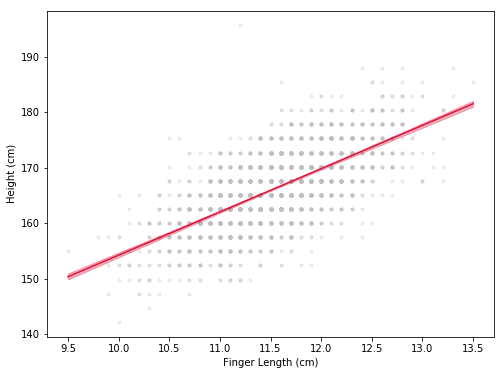

In [99]:
f, ax = plt.subplots(figsize = (8,6))

ax.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.75', alpha = 0.25)
ax.plot(finger_lengths, mu_mean, color = 'crimson')
ax.fill_between(finger_lengths, mu_hpd[:,0], mu_hpd[:,1], color = 'crimson', alpha = 0.33)
ax.set_ylabel('Height (cm)')
ax.set_xlabel('Finger Length (cm)');

## Prediction Interval

The interval above tells us something about the uncertainty in average height, but what if we wanted to know about the variation in the actual data? We can use the posterior estimates of $\sigma$ to do this. In effect we can generate or simulate new data points based on the estimates of $\alpha$, $\beta$ and $\sigma$ using the likelihood function. We can then derive a highest posterior density interval from these simulated data points.

In [134]:
finger_lengths1 = np.arange(criminals['finger_length'].min(), criminals['finger_length'].max()+0.1, 0.1)

# Generate heights from the posterior distribution
post_samples = []
for _ in range(1000):
    i = np.random.randint(len(posterior))
    mu_pred = posterior[alpha][i] + posterior[beta][i] * finger_lengths1
    post_samples.append(np.random.normal(mu_pred, posterior[sigma][i]))
post_samples = np.array(post_samples)

# get interval for generated heights
post_samples_hpd = pm.hpd(post_samples)

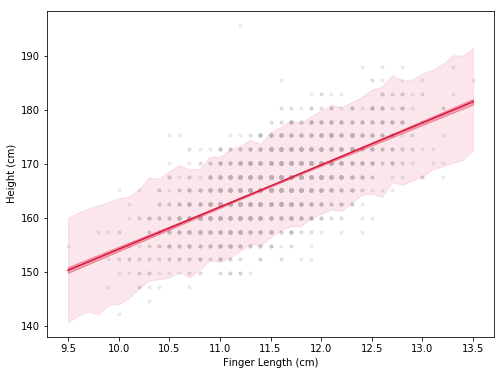

In [135]:
f, ax = plt.subplots(figsize = (8,6))

ax.scatter(criminals['finger_length'], criminals['height'], marker='.', color = '0.75', alpha = 0.25)
ax.plot(finger_lengths, mu_mean, color = 'crimson')
ax.fill_between(finger_lengths, mu_hpd[:,0], mu_hpd[:,1], color = 'crimson', alpha = 0.33)
ax.fill_between(finger_lengths1, post_samples_hpd[:,0], post_samples_hpd[:,1], color = 'crimson', alpha = 0.1)
ax.set_ylabel('Height (cm)')
ax.set_xlabel('Finger Length (cm)');

The plot above shows an 89% prediction interval for height as a function of finger length in pink. The red line is the MAP line, and the narrow shaded area around the line is the uncertainty of the MAP line.

Both shaded areas are effectively plausible regions, the narrow shaded area is the distribution of the mean given by the linear model, whereas the wide shaded area is the region within which the model expects to find 89% of the actual heights in the population.

# Consolidation

There's already a lot here, and all we've really done is introduce the simple linear regression model!

As a **thought experiment**, consider how you might extend the simple linear model to a **multivariate linear model** if more explanatory variables became available. How would the model change? What does this mean for the inclusion of priors?

Generating a posterior distribution for a multivariate regression model is practically similar to what we've established in the code above. Other, more complex models can also be specified, it's a relatively small step to move to the generalised linear modelling world, using a likelihood function other than the Gaussian, and specifying a link function other than identity. Further, all kinds of heirarchical models and models with interesting dependency structures become tractable.

We'll leave it to you to develop further in this area if it appeals. My particular recommendation is the book that has guided a lot of the material here:

McElreath R. 2016. *Statistical Rethinking: A Bayesian Course with Examples in R and Stan.* CRC Press.